In [2]:
library(dplyr)


Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
#Read datasets
#Download the data from http://www.saedsayad.com/datasets/CreditData.zip
train <- read.csv("Credit_train.csv")
test <- read.csv("Credit_test.csv")

In [4]:
#Show  
head(train)
head(test)

,BUSAGE,BUSTYPE,MAXLINEUTIL,DAYSDELQ,TOTACBAL,DEFAULT
,<int>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,183,B,0,0,0.24,N
2,271,E,0,0,1.37,N
3,51,A,0,0,1.52,N
4,208,A,0,0,1.64,N
5,148,A,0,0,1.78,N
6,82,D,0,0,1.88,N


,BUSAGE,BUSTYPE,MAXLINEUTIL,DAYSDELQ,TOTACBAL,DEFAULT
,<int>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,354,A,3.0425,0,152125.6,N
2,99,A,0.0000,0,151060.9,N
3,100,A,2.4507,0,122538.6,N
4,85,C,1.1397,0,113975.4,N
5,82,A,1.1241,0,112415.7,N
6,62,A,0.0000,0,106760.2,Y


In [5]:
#-----
# LDA
#-----
library(caret)
library(AUC)
library(MASS)

#remove all records with missing values
train <- na.omit(train)
test <- na.omit(test)

#train
model.LDA <- lda(DEFAULT~., data=train)
model.LDA

#variables importance
model.LDA$scaling

#test
pc <- predict(model.LDA, test)
summary(pc$class)
xtab <- table(pc$class, test$DEFAULT)
caret::confusionMatrix(xtab, positive = "Y")

#lift chart
pb <- NULL
pb <- pc$posterior
pb <- as.data.frame(pb)
pred.LDA <- data.frame(test$DEFAULT, pb$Y)
colnames(pred.LDA) <- c("target","score")
lift.LDA <- lift(target ~ score, data = pred.LDA, cuts=10, class="Y")
xyplot(lift.LDA, main="LDA - Lift Chart", type=c("l","g"), lwd=2
       , scales=list(x=list(alternating=FALSE,tick.number = 10)
                     ,y=list(alternating=FALSE,tick.number = 10)))

#roc chart
labels <- as.factor(ifelse(pred.LDA$target=="Y", 1, 0))
predictions <- pred.LDA$score
auc(roc(predictions, labels), min = 0, max = 1)
plot(roc(predictions, labels), min=0, max=1, type="l", main="LDA - ROC Chart")

Call:
lda(DEFAULT ~ ., data = train)

Prior probabilities of groups:
        N         Y 
0.9139355 0.0860645 

Group means:
     BUSAGE  BUSTYPEB   BUSTYPEC   BUSTYPED     BUSTYPEE    BUSTYPEF
N 116.88465 0.2442296 0.06228055 0.08282968 0.0009785299 0.002820469
Y  85.82885 0.2652812 0.04706601 0.07579462 0.0006112469 0.003667482
  MAXLINEUTIL   DAYSDELQ TOTACBAL
N   0.4498486 0.08311748 22791.31
Y   0.7775695 3.76711491 27707.46

Coefficients of linear discriminants:
                      LD1
BUSAGE      -2.522905e-03
BUSTYPEB    -2.382606e-02
BUSTYPEC    -1.910992e-01
BUSTYPED    -1.071924e-01
BUSTYPEE    -2.338590e-01
BUSTYPEF     3.398732e-01
MAXLINEUTIL  2.059445e+00
DAYSDELQ     6.988151e-02
TOTACBAL    -8.153696e-06

,LD1
BUSAGE,-2.522905e-03
BUSTYPEB,-2.382606e-02
BUSTYPEC,-1.910992e-01
BUSTYPED,-1.071924e-01
BUSTYPEE,-2.338590e-01
BUSTYPEF,3.398732e-01
MAXLINEUTIL,2.059445e+00
DAYSDELQ,6.988151e-02
TOTACBAL,-8.153696e-06


N    Y 
4680   26

Confusion Matrix and Statistics

   
       N    Y
  N 4289  391
  Y    8   18
                                         
               Accuracy : 0.9152         
                 95% CI : (0.9069, 0.923)
    No Information Rate : 0.9131         
    P-Value [Acc > NIR] : 0.3134         
                                         
                  Kappa : 0.0731         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.044010       
            Specificity : 0.998138       
         Pos Pred Value : 0.692308       
         Neg Pred Value : 0.916453       
             Prevalence : 0.086910       
         Detection Rate : 0.003825       
   Detection Prevalence : 0.005525       
      Balanced Accuracy : 0.521074       
                                         
       'Positive' Class : Y              
                                         

ERROR: Error in lift.formula(target ~ score, data = pred.LDA, cuts = 10, class = "Y"): the left-hand side of the formula must be a factor of classes


In [ ]:
#---------------------
# K Nearest Neighbors
#---------------------
library(kknn)

#remove all records with missing values
train <- na.omit(train)
test <- na.omit(test)

#train
model.KNN <- kknn(DEFAULT~., train, test, k=5, distance = 2, scale=FALSE)
summary(model.KNN)

#confusion matrix
pc <- NULL
pc <- predict(model.KNN, test, type="raw")
xtab <- table(pc, test$DEFAULT)
caret::confusionMatrix(xtab, positive="Y")

#lift chart
pb <- NULL
pb <- predict(model.KNN, test, type="prob")
pb <- as.data.frame(pb)
pred.KNN <- data.frame(test$DEFAULT, pb$Y)
colnames(pred.KNN) <- c("target","score")
lift.KNN <- lift(target ~ score, data = pred.KNN, cuts=10, class="Y")
xyplot(lift.KNN, main="KNN - Lift Chart", type=c("l","g"), lwd=2
       , scales=list(x=list(alternating=FALSE,tick.number = 10)
                     ,y=list(alternating=FALSE,tick.number = 10)))

#roc chart
labels <- as.factor(ifelse(pred.KNN$target=="Y", 1, 0))
predictions <- pred.KNN$score
auc(roc(predictions, labels), min = 0, max = 1)
plot(roc(predictions, labels), min=0, max=1, type="l", main="KNN - ROC Chart")

In [ ]:
#------------------------------------------
# Support Vector Machines - Classification
#------------------------------------------
library(caret)
library(e1071)
library(AUC)

#remove all records with missing values
train <- na.omit(train)
test <- na.omit(test)

#train
model.SVM <- svm(DEFAULT~., train, kernel ='linear')
summary(model.SVM)

#confusion matrix
pc <- NULL
pc <- predict(model.SVM, test, type = "class")
xtab <- table(pc, test$DEFAULT)
caret::confusionMatrix(xtab, positive="Y")

#lift chart
pb <- NULL
pb <- predict(model.SVM, test, type="raw")
pb <- as.data.frame(pb)
pred.SVM <- data.frame(test$DEFAULT, pb)
colnames(pred.SVM) <- c("target","score")
lift.SVM <- lift(target ~ score, data = pred.SVM, cuts=10, class="Y")
xyplot(lift.SVM, main="SVM - Lift Chart", type=c("l","g"), lwd=2
       ,scales=list(x=list(alternating=FALSE,tick.number = 10)
                     ,y=list(alternating=FALSE,tick.number = 10)))


#roc chart
labels <- as.factor(ifelse(pred.SVM$target=="Y", 1, 0))
predictions <- pred.SVM$score
auc(roc(predictions, labels), min = 0, max = 1)
plot(roc(predictions, labels), min=0, max=1, type="l", main="SVM - ROC Chart")


    0     1 
17373  1636 


   0    1 
4297  409 

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = DEFAULT ~ BUSAGE + MAXLINEUTIL + DAYSDELQ + TOTACBAL, 
    family = binomial(logit), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.1202  -0.4706  -0.3231  -0.2478   3.2583  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.134e+00  6.730e-02 -46.558  < 2e-16 ***
BUSAGE      -3.424e-03  3.580e-04  -9.562  < 2e-16 ***
MAXLINEUTIL  2.043e+00  8.531e-02  23.954  < 2e-16 ***
DAYSDELQ     7.411e-02  6.574e-03  11.273  < 2e-16 ***
TOTACBAL    -5.501e-06  1.353e-06  -4.065  4.8e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 11152.1  on 19008  degrees of freedom
Residual deviance:  9918.6  on 19004  degrees of freedom
AIC: 9928.6

Number of Fisher Scoring iterations: 6


      pb           
 Length:4706       
 Class :character  
 Mode  :character  

Confusion Matrix and Statistics

   
pc     0    1
  0 4290  391
  1    7   18
                                          
               Accuracy : 0.9154          
                 95% CI : (0.9071, 0.9232)
    No Information Rate : 0.9131          
    P-Value [Acc > NIR] : 0.2952          
                                          
                  Kappa : 0.0737          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.044010        
            Specificity : 0.998371        
         Pos Pred Value : 0.720000        
         Neg Pred Value : 0.916471        
             Prevalence : 0.086910        
         Detection Rate : 0.003825        
   Detection Prevalence : 0.005312        
      Balanced Accuracy : 0.521190        
                                          
       'Positive' Class : 1               
                                          

[1] 0.7373365

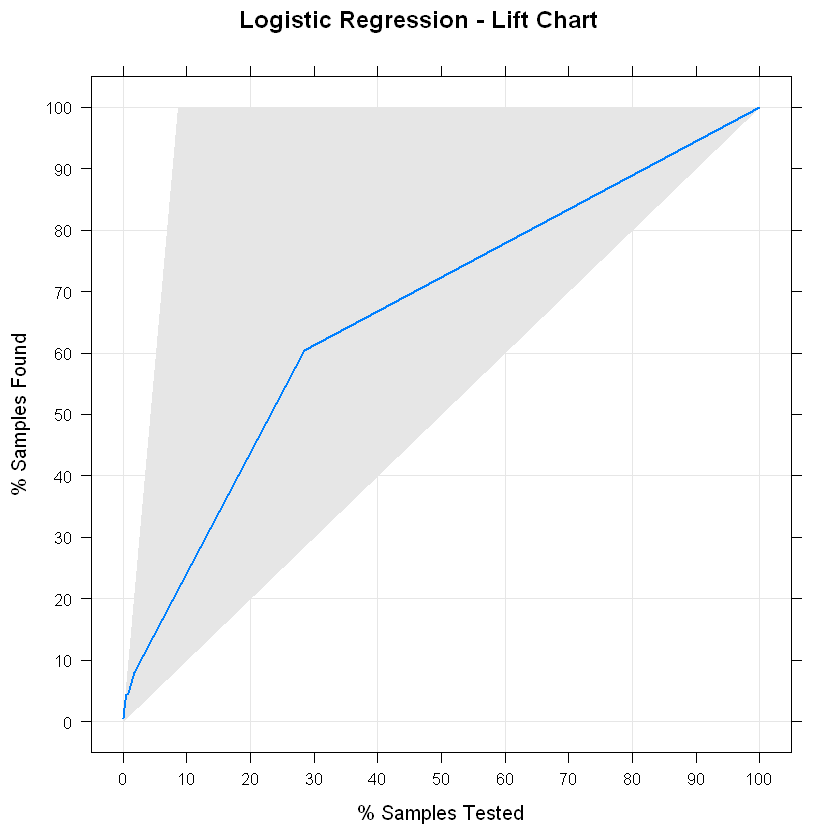

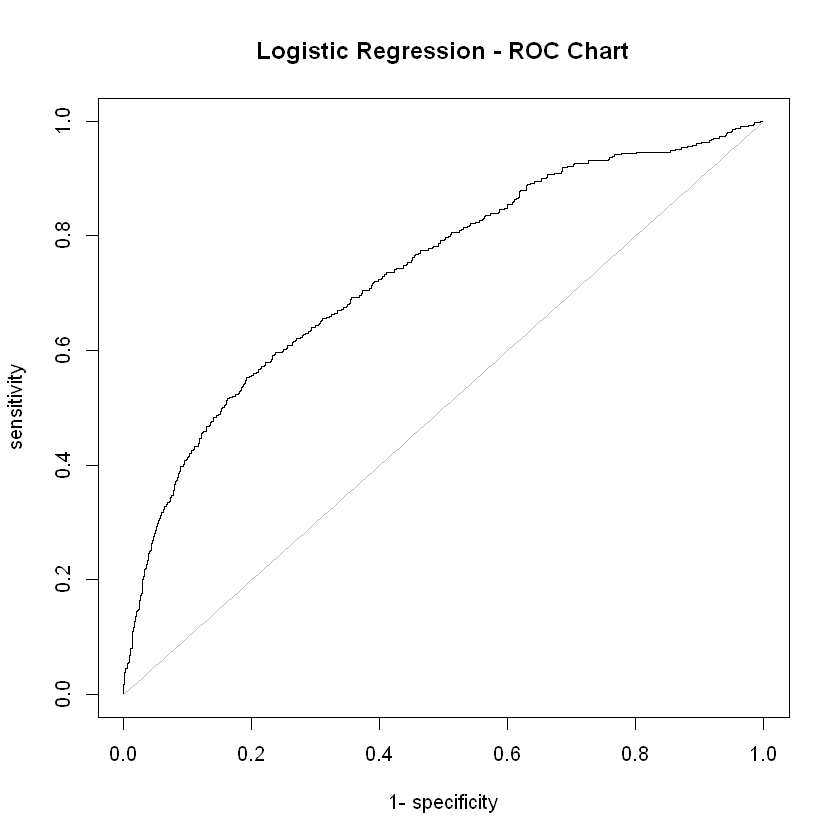

In [6]:
#--------------------
# Logistc regression
#--------------------
library(caret)
library(MASS)	
library(AUC)

#remove all records with missing values
train <- na.omit(train)
test <- na.omit(test)

#Binary target
train$DEFAULT <- as.factor(ifelse(train$DEFAULT=="Y", 1, 0))
test$DEFAULT <- as.factor(ifelse(test$DEFAULT=="Y", 1, 0))

table(train$DEFAULT)
table(test$DEFAULT)


#train
model.LogReg <- glm(DEFAULT~BUSAGE+MAXLINEUTIL+DAYSDELQ+TOTACBAL,family=binomial(logit), data=train)
summary(model.LogReg)


#lift chart
pb <- NULL
pb <- predict(model.LogReg, test)
pb <- as.data.frame(pb)
pred.LogReg <- data.frame(test$DEFAULT, 1/(1+(exp(1)^-pb)))
colnames(pred.LogReg) <- c("target","score")
lift.LogReg <- lift(target ~ score, data = pred.LogReg, cuts=10, class="1")
xyplot(lift.LogReg, main="Logistic Regression - Lift Chart", type=c("l","g"), lwd=2
       , scales=list(x=list(alternating=FALSE,tick.number = 10)
                     ,y=list(alternating=FALSE,tick.number = 10)))

#confusion matrix
pc <- NULL
pc <- ifelse(pb > 0.5,"1","0")
summary(pc)
xtab <- table(pc, test$DEFAULT)
caret::confusionMatrix(xtab, positive = "1")

#roc chart
labels <- pred.LogReg$target
predictions <- pred.LogReg$score
auc(roc(predictions, labels), min = 0, max = 1)
plot(roc(predictions, labels), min=0, max=1, type="l", main="Logistic Regression - ROC Chart")